Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 1)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 1)     26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
img_batch: (1, 772, 564)


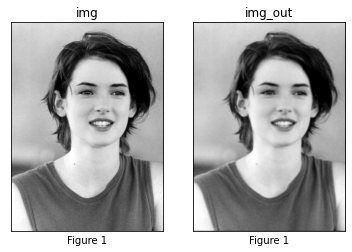

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 1)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 1)     26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
img_pad: (776, 568)
img: (772, 564)
img_batch: (1, 776, 568)


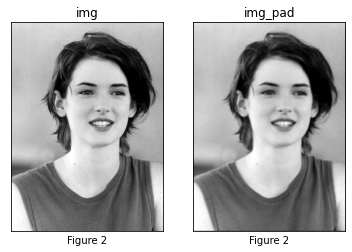

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Steps 2~9 (25 points)[Method 1]
# Enter your code here.
kernel_size=5
stride=(1, 1)

inputs = tf.keras.Input((None, None, 1))
outputs = Conv2D(1, kernel_size, stride, padding='same', name='conv1')(inputs)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)
filter_net.summary()

conv1_weights = np.ones((kernel_size, kernel_size, 1, 1)) / kernel_size**2
filter_net.get_layer('conv1').set_weights([conv1_weights, np.array([0])])
img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)#(772, 564)

img_batch=np.expand_dims(img,axis=0)
print("img_batch:",img_batch.shape) # img_batch.shape:(1, 772, 564)
img_out = filter_net(img_batch)
img_out=np.array(img_out, dtype='uint8')

# show the pictures
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.title('img',color='black')
plt.imshow(img, cmap='gray')
plt.xlabel('Figure 1',color='black')

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.title('img_out',color='black')
plt.imshow(img_out.reshape(772, 564), cmap='gray')
plt.xlabel('Figure 1',color='black')

plt.show()



# Steps 10~13 (15 points)[Method 2]
# Enter your code here.
kernel_size=5
stride=1

pad = int((kernel_size-1) / 2)
img_pad=np.zeros((772+2*pad, 564+2*pad)) # (776,568)

inputs = tf.keras.Input((None, None, 1))
outputs = Conv2D(1, kernel_size, stride, padding='valid', name='conv1')(inputs)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)
filter_net.summary()

conv1_weights = np.ones((kernel_size, kernel_size, 1, 1)) / kernel_size**2
filter_net.get_layer('conv1').set_weights([conv1_weights, np.array([0])])
img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)#(772, 564)
img_pad[2:774,2:566]=img
plt.imshow(img_pad, cmap='gray')
print("img_pad:",img_pad.shape)
plt.imshow(img, cmap='gray')
print("img:",img.shape)

img_batch=np.expand_dims(img_pad,axis=0)
print("img_batch:",img_batch.shape) # img_batch.shape:(1, 772+2*pad, 564+2*pad)
img_out = filter_net(img_batch)
img_out=np.array(img_out, dtype='uint8')

# show the pictures
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.title('img',color='black')
plt.imshow(img, cmap='gray')
plt.xlabel('Figure 2',color='black')

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.title('img_pad',color='black')
plt.imshow(img_out.reshape(772, 564), cmap='gray')
plt.xlabel('Figure 2',color='black')

plt.show()


In [ ]:
# [Question 1 (5 points)] 
# If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?
# more blurry, kernel_size是卷積核大小，一般為正方形，邊長為奇數，便於尋找中心點。
# 卷積實際上是輸入矩陣與kernel_size後，進行對應元素的求和，所以一次卷積的結果就是輸出一個數值，最後對整個矩陣進行遍歷，得出結果的矩陣。。
# 倘若kernel_size越大，receptive field越大，看到的圖片資訊越多，所獲得的全域性特徵越好，但是較大的卷積核會造成計算效能降低。
# 以數學的角度來說，由於較大的kernel_size讓距離中心點更遠的位置也有了權重，這會導致圖片越模糊。

In [ ]:
# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, 
# and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?
# Method 1的output padding的參數為'same'，這代表在做卷積時，輸出的圖片尺寸與input的尺寸一樣。padding='same'的處理圖片尺寸的方式就是將圖片多填充一行/列0向量，這是為了不影響原始特徵與圖片信息。
# Method 2的output padding的參數為'valid'，這代表在做卷積時，不會主動將圖片保有原圖尺寸，也就是它不會填充0向量。但在Method 2一開始，img_pad=np.zeros((772+2*pad, 564+2*pad))就已經將圖片尺寸固定好了，之後是用插入的方式將處理好的圖片插入這個零矩陣中，這樣的處理方式就跟Method 1使用padding='same'得出的結果是一樣的。
